In [1]:
import pandas as pd
import missingno as msno
import warnings

pd.set_option('max_rows', 500), pd.set_option('max_columns', 500), pd.set_option('float_format', '{:.2f}'.format)
warnings.filterwarnings(action='ignore')

In [2]:
dtypes = {
    'cedula1': 'category',
    'franquicia': 'category',
    'tipo_tarjeta': 'category',
    'numerotarjeta1': 'category'
}
estado = pd.read_csv('data/estado_tc.csv', sep=';', 
                     parse_dates=['fecha_de_emision', 'fecha_ult_aumento_cupo'], dtype=dtypes)
print(f'El conjunto de datos tiene {estado.shape[0]} observaciones, y {estado.shape[1]} variables')
estado.head()

El conjunto de datos tiene 649133 observaciones, y 12 variables


,cedula1,franquicia,tipo_tarjeta,numerotarjeta1,cupo_global,disponible,fecha_de_emision,fecha_ult_aumento_cupo,total_mes_en_mora,altura_de_mora,codigo_vendedor,codigo_estado_tarjeta
0,8038,AMEX,AZUL,8139,4800000.00,4782660.85,2012-05-22,20150604,0,0.00,2046,0
1,6464,AMEX,AZUL,27001,2300000.00,2028137.20,2012-04-30,0,0,0.00,30603,0
2,21485,AMEX,AZUL,10472,3850000.00,1747203.27,2012-05-25,20140611,1,0.00,21997,0
3,94073,AMEX,AZUL,12060,1000000.00,57880.51,2012-04-25,0,4,0.00,10497,0
4,42865,AMEX,AZUL,5445,1800000.00,0.00,2012-05-14,0,1,0.00,24071,0


In [3]:
estado['aumento_cupo'] = estado['fecha_ult_aumento_cupo'].apply(lambda x: 1 if x != '0' else 0)

In [4]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649133 entries, 0 to 649132
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   cedula1                 649133 non-null  category      
 1   franquicia              649133 non-null  category      
 2   tipo_tarjeta            649133 non-null  category      
 3   numerotarjeta1          649133 non-null  category      
 4   cupo_global             649133 non-null  float64       
 5   disponible              649133 non-null  float64       
 6   fecha_de_emision        649133 non-null  datetime64[ns]
 7   fecha_ult_aumento_cupo  649133 non-null  object        
 8   total_mes_en_mora       649133 non-null  int64         
 9   altura_de_mora          649133 non-null  float64       
 10  codigo_vendedor         649133 non-null  int64         
 11  codigo_estado_tarjeta   649133 non-null  int64         
 12  aumento_cupo            649133

In [5]:
estado.describe(exclude='number')

,cedula1,franquicia,tipo_tarjeta,numerotarjeta1,fecha_de_emision,fecha_ult_aumento_cupo
count,649133,649133,649133,649133,649133,649133
unique,126127,3,18,129832,6302,2585
top,77207,AMEX,AZUL,99999,2002-08-02 00:00:00,0
freq,20,242291,164561,5,1700,421202
first,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2015-06-30 00:00:00,NaN


In [6]:
estado.describe()

,cupo_global,disponible,total_mes_en_mora,altura_de_mora,codigo_vendedor,codigo_estado_tarjeta,aumento_cupo
count,649133.00,649133.00,649133.00,649133.00,649133.00,649133.00,649133.00
mean,3501485.96,2044669.44,3.23,0.34,15811.66,1575832687.60,0.35
std,4250755.25,3644364.87,7.03,3.35,30149.03,1498083062.05,0.48
min,0.59,0.00,0.00,0.00,0.00,0.00,0.00
25%,1200000.00,0.00,0.00,0.00,2802.00,0.00,0.00
50%,2100000.00,795385.63,0.00,0.00,13579.00,3000000000.00,0.00
75%,4100000.00,2569341.07,3.00,0.00,25832.00,3000000000.00,1.00
max,200000000.00,100000000.00,99.00,150.00,6551460.00,3000000000.00,1.00


In [7]:
test = estado.loc[estado['cedula1'] == '88690', :].sort_values(['numerotarjeta1', 'fecha_de_emision'])
test

,cedula1,franquicia,tipo_tarjeta,numerotarjeta1,cupo_global,disponible,fecha_de_emision,fecha_ult_aumento_cupo,total_mes_en_mora,altura_de_mora,codigo_vendedor,codigo_estado_tarjeta,aumento_cupo
18256,88690,AMEX,AZUL,24011,1300000.00,1300000.00,2006-09-14,20080916,0,0.00,2383,3000000000,1
147501,88690,AMEX,AZUL,24011,1300000.00,1300000.00,2006-09-14,20080916,0,0.00,2383,3000000000,1
288430,88690,AMEX,AZUL,24011,1300000.00,1300000.00,2006-09-14,20080916,0,0.00,2383,3000000000,1
411057,88690,AMEX,AZUL,24011,1300000.00,1300000.00,2006-09-14,20080916,0,0.00,2383,3000000000,1
536327,88690,AMEX,AZUL,24011,1300000.00,1300000.00,2006-09-14,20080916,0,0.00,2383,3000000000,1
33429,88690,AMEX,PLATINUM,34304,20000000.00,15636129.63,2012-11-21,0,0,0.00,10970,0,0
163554,88690,AMEX,PLATINUM,34304,10000000.00,9961861.66,2012-11-21,20150916,0,0.00,10970,0,1
293386,88690,AMEX,PLATINUM,34304,20000000.00,19371928.36,2012-11-21,0,0,0.00,10970,0,0
422414,88690,AMEX,PLATINUM,34304,10000000.00,9942984.66,2012-11-21,20150916,0,0.00,10970,0,1
552315,88690,AMEX,PLATINUM,34304,20000000.00,16368788.43,2012-11-21,0,0,0.00,10970,0,0


In [8]:
subset = ['cedula1', 'franquicia', 'tipo_tarjeta',
          'numerotarjeta1', 'fecha_de_emision', 'codigo_vendedor', 'codigo_estado_tarjeta']
estado[estado.duplicated(subset=subset, keep=False)]

,cedula1,franquicia,tipo_tarjeta,numerotarjeta1,cupo_global,disponible,fecha_de_emision,fecha_ult_aumento_cupo,total_mes_en_mora,altura_de_mora,codigo_vendedor,codigo_estado_tarjeta,aumento_cupo
0,8038,AMEX,AZUL,8139,4800000.00,4782660.85,2012-05-22,20150604,0,0.00,2046,0,1
1,6464,AMEX,AZUL,27001,2300000.00,2028137.20,2012-04-30,0,0,0.00,30603,0,0
2,21485,AMEX,AZUL,10472,3850000.00,1747203.27,2012-05-25,20140611,1,0.00,21997,0,1
3,94073,AMEX,AZUL,12060,1000000.00,57880.51,2012-04-25,0,4,0.00,10497,0,0
4,42865,AMEX,AZUL,5445,1800000.00,0.00,2012-05-14,0,1,0.00,24071,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649128,34483,MASTERCARD,MASTERCARD PLATINUM,129037,10000000.00,10000000.00,1991-09-01,20141022,3,0.00,0,0,1
649129,8227,MASTERCARD,MASTERCARD PLATINUM,129059,23000000.00,21291846.33,1997-05-21,20150604,0,0.00,0,0,1
649130,11575,MASTERCARD,MASTERCARD PLATINUM,129461,15000000.00,15000000.00,2012-07-23,0,3,0.00,14356,0,0
649131,77775,MASTERCARD,MASTERCARD PLATINUM,129488,19500000.00,6752053.20,1999-05-27,20131009,23,0.00,0,0,1


In [9]:
estado = estado.drop_duplicates(subset=subset, keep='last')
estado.head()

,cedula1,franquicia,tipo_tarjeta,numerotarjeta1,cupo_global,disponible,fecha_de_emision,fecha_ult_aumento_cupo,total_mes_en_mora,altura_de_mora,codigo_vendedor,codigo_estado_tarjeta,aumento_cupo
50,19729,AMEX,AZUL,9255,2000000.00,1806918.75,2012-06-01,0,0,0.00,29028,0,0
64,45353,AMEX,AZUL,4277,2950000.00,166296.27,2012-05-07,20150226,0,0.00,26738,0,1
75,16088,AMEX,AZUL,31106,1800000.00,1713162.73,2012-10-17,0,0,0.00,30138,0,0
123,8355,AMEX,AZUL,9201,1900000.00,1868737.92,2011-03-11,0,41,30.00,21431,0,0
137,20384,AMEX,AZUL,32388,2000000.00,1891902.13,2012-08-03,0,9,30.00,17349,0,0


In [10]:
estado.describe(exclude='number')

,cedula1,franquicia,tipo_tarjeta,numerotarjeta1,fecha_de_emision,fecha_ult_aumento_cupo
count,133123,133123,133123,133123,133123,133123
unique,126127,3,18,129832,6302,2540
top,48341,AMEX,AZUL,8695,2002-08-02 00:00:00,0
freq,6,49670,33798,2,340,86647
first,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2015-06-30 00:00:00,NaN


In [11]:
subset = ['cedula1', 'franquicia', 'tipo_tarjeta',
          'numerotarjeta1', 'cupo_global','fecha_de_emision',
          'fecha_ult_aumento_cupo', 'total_mes_en_mora', 'altura_de_mora', 'codigo_vendedor']
estado[estado.duplicated(subset=subset, keep=False)]

,cedula1,franquicia,tipo_tarjeta,numerotarjeta1,cupo_global,disponible,fecha_de_emision,fecha_ult_aumento_cupo,total_mes_en_mora,altura_de_mora,codigo_vendedor,codigo_estado_tarjeta,aumento_cupo
50,19729,AMEX,AZUL,9255,2000000.00,1806918.75,2012-06-01,0,0,0.00,29028,0,0
64,45353,AMEX,AZUL,4277,2950000.00,166296.27,2012-05-07,20150226,0,0.00,26738,0,1
75,16088,AMEX,AZUL,31106,1800000.00,1713162.73,2012-10-17,0,0,0.00,30138,0,0
145,6338,AMEX,AZUL,17952,1000000.00,593463.40,2012-10-24,0,1,0.00,31837,0,0
160,115494,AMEX,AZUL,9582,4250000.00,183232.27,2012-11-06,20150604,1,0.00,2018,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648671,51775,MASTERCARD,MASTERCARD PLATINUM,129714,10000000.00,10000000.00,2014-10-28,0,0,0.00,10853,0,0
648754,11827,MASTERCARD,MASTERCARD PLATINUM,128925,2500.00,2500.00,2011-04-18,20150710,0,0.00,26365,0,1
648789,80697,MASTERCARD,MASTERCARD PLATINUM,129577,10000000.00,9302652.27,2005-06-03,20130806,1,0.00,0,0,1
648942,432,MASTERCARD,MASTERCARD PLATINUM,128359,11000000.00,11000000.00,2009-05-20,0,0,0.00,0,0,0


In [12]:
estado.drop_duplicates(subset=['numerotarjeta1'], keep=False, inplace=True)

In [13]:
estado.describe(exclude='number')

,cedula1,franquicia,tipo_tarjeta,numerotarjeta1,fecha_de_emision,fecha_ult_aumento_cupo
count,126541,126541,126541,126541,126541,126541
unique,123014,3,18,126541,6293,2512
top,77207,AMEX,AZUL,99999,2002-08-02 00:00:00,0
freq,4,47248,32028,1,340,82461
first,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2015-06-30 00:00:00,NaN


In [14]:
estado[estado['cedula1'] == '77207']

,cedula1,franquicia,tipo_tarjeta,numerotarjeta1,cupo_global,disponible,fecha_de_emision,fecha_ult_aumento_cupo,total_mes_en_mora,altura_de_mora,codigo_vendedor,codigo_estado_tarjeta,aumento_cupo
553513,77207,AMEX,PLATINUM,33648,13500000.00,12230499.50,2014-04-25,0,0,0.00,34675,0,0
564360,77207,AMEX,ORO,47491,10500000.00,10500000.00,2008-10-07,0,0,0.00,19617,3000000000,0
601324,77207,VISA,ORO TRADICIONAL,80004,6750000.00,0.00,2012-06-21,20150226,0,0.00,21938,3000000000,1
601639,77207,VISA,ORO TRADICIONAL,77866,5000000.00,0.00,2008-10-07,0,0,0.00,19617,3000000000,0


In [15]:
dtypes = {
    'cedula1': 'category'
}
trx = pd.read_csv('data/trx.csv', sep=';',
                  parse_dates=['fecha_de_transaccion'], dtype=dtypes)
trx.head()

,cedula1,numerotarjeta1,fecha_de_transaccion,codigo_transaccion,valor_transaccion,numero_cuotas_diferidas
0,111560,126332,2015-10-02,4,86712.00,0
1,111560,126332,2015-10-31,6,71000.00,2
2,111560,126332,2015-10-27,6,200000.00,3
3,111560,126332,2015-10-27,6,155000.00,2
4,111561,127095,2015-10-15,4,90000.00,0


In [16]:
trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045721 entries, 0 to 2045720
Data columns (total 6 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   cedula1                  category      
 1   numerotarjeta1           int64         
 2   fecha_de_transaccion     datetime64[ns]
 3   codigo_transaccion       int64         
 4   valor_transaccion        float64       
 5   numero_cuotas_diferidas  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 88.8 MB


In [17]:
trx.describe(exclude='number')

,cedula1,fecha_de_transaccion
count,2045721,2045721
unique,62991,304
top,116773,2015-02-16 00:00:00
freq,623,22601
first,NaN,2015-01-01 00:00:00
last,NaN,2015-10-31 00:00:00


In [18]:
trx.describe()

,numerotarjeta1,codigo_transaccion,valor_transaccion,numero_cuotas_diferidas
count,2045721.00,2045721.00,2045721.00,2045721.00
mean,70593.99,10.29,234180.88,3.56
std,38193.59,17.03,682557.62,7.10
min,8.00,3.00,-5354436.00,0.00
25%,38739.00,4.00,15700.00,0.00
50%,69535.00,6.00,60296.00,1.00
75%,107310.00,6.00,192452.00,2.00
max,129832.00,69.00,59797534.00,36.00


In [2]:
dtypes = {
    'cedula1': 'category'
}
sociodemografico = pd.read_csv('data/info_sociodemografica.csv', sep=';',
                               dtype=dtypes, parse_dates=['fecha_de_nacimiento', 'fecha_de_vinculación'])
sociodemografico.head()

,cedula1,sexo,estado_del_cliente,fecha_de_nacimiento,fecha_de_vinculación,valor_ingresos,estado_civil,nivel_academico,profesión,ocupacion,es_nomina_bancolombia,ciudad,ivc_cantidad_portafolio,ivc_tiene_grupo,tamaño_comercial,total_cartera,total_captaciones,max_mora,resultado_consulta_bibic,score,saldo_no_rotativo_entidad,saldo_no_rotativo_mcdo,saldo_prom_tdc_entidad_(trim),saldo_prom_tdc_mcdo_(trim),cupo_tdc_entidad,cupo_tdc_mcdo
0,3,M,Activo,19311010,1977-03-01,13577075.00,CASADO,UNIVERSITARIO,11.00,JUBILADO,1,BOGOTA D.C.,4,4,6728.00,4563.00,2166.00,0.00,S,733.00,4576.00,47768.00,nan,13969.00,nan,68300.00
1,4,M,Activo,19300902,1999-01-14,3220000.00,CASADO,H,nan,JUBILADO,0,CALI,2,3,3467.00,2448.00,1020.00,0.00,S,793.00,nan,20378.00,246.00,11315.00,2600.00,42205.00
2,5,F,Activo,19221225,1980-12-09,1800000.00,VIUDO,H,nan,RENTISTA DE CAPITAL,0,BOGOTA D.C.,1,2,347.00,347.00,0.00,0.00,S,782.00,nan,nan,120.00,nan,1600.00,nan
3,6,M,Inactivo,19201027,1972-11-01,2141247.00,CASADO,UNIVERSITARIO,11.00,JUBILADO,0,BOGOTA D.C.,1,2,52.00,0.00,52.00,nan,S,nan,nan,nan,nan,nan,nan,nan
4,8,M,Activo,19260831,1992-04-28,2296014.00,CASADO,H,nan,JUBILADO,1,BOGOTA D.C.,6,4,19397.00,0.00,19397.00,nan,S,829.00,nan,nan,nan,0.00,nan,11410.00


In [3]:
sociodemografico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346481 entries, 0 to 346480
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   cedula1                        346481 non-null  category      
 1   sexo                           346407 non-null  object        
 2   estado_del_cliente             346481 non-null  object        
 3   fecha_de_nacimiento            346481 non-null  object        
 4   fecha_de_vinculación           346481 non-null  datetime64[ns]
 5   valor_ingresos                 346481 non-null  float64       
 6   estado_civil                   346244 non-null  object        
 7   nivel_academico                346481 non-null  object        
 8   profesión                      255868 non-null  float64       
 9   ocupacion                      346225 non-null  object        
 10  es_nomina_bancolombia          346481 non-null  int64         
 11  

In [4]:
sociodemografico.describe(exclude='number')

,cedula1,sexo,estado_del_cliente,fecha_de_nacimiento,fecha_de_vinculación,estado_civil,nivel_academico,ocupacion,ciudad,resultado_consulta_bibic
count,346481,346407,346481,346481,346481,346244,346481,346225,345823,346230
unique,116568,2,3,20831,10567,7,10,15,246,4
top,559,M,Activo,.,1911-11-11 00:00:00,SOLTERO,UNIVERSITARIO,EMPLEADO,MEDELLIN,S
freq,6,191133,334303,1402,1301,128123,149255,242108,72035,305342
first,NaN,NaN,NaN,NaN,1911-11-11 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2015-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN


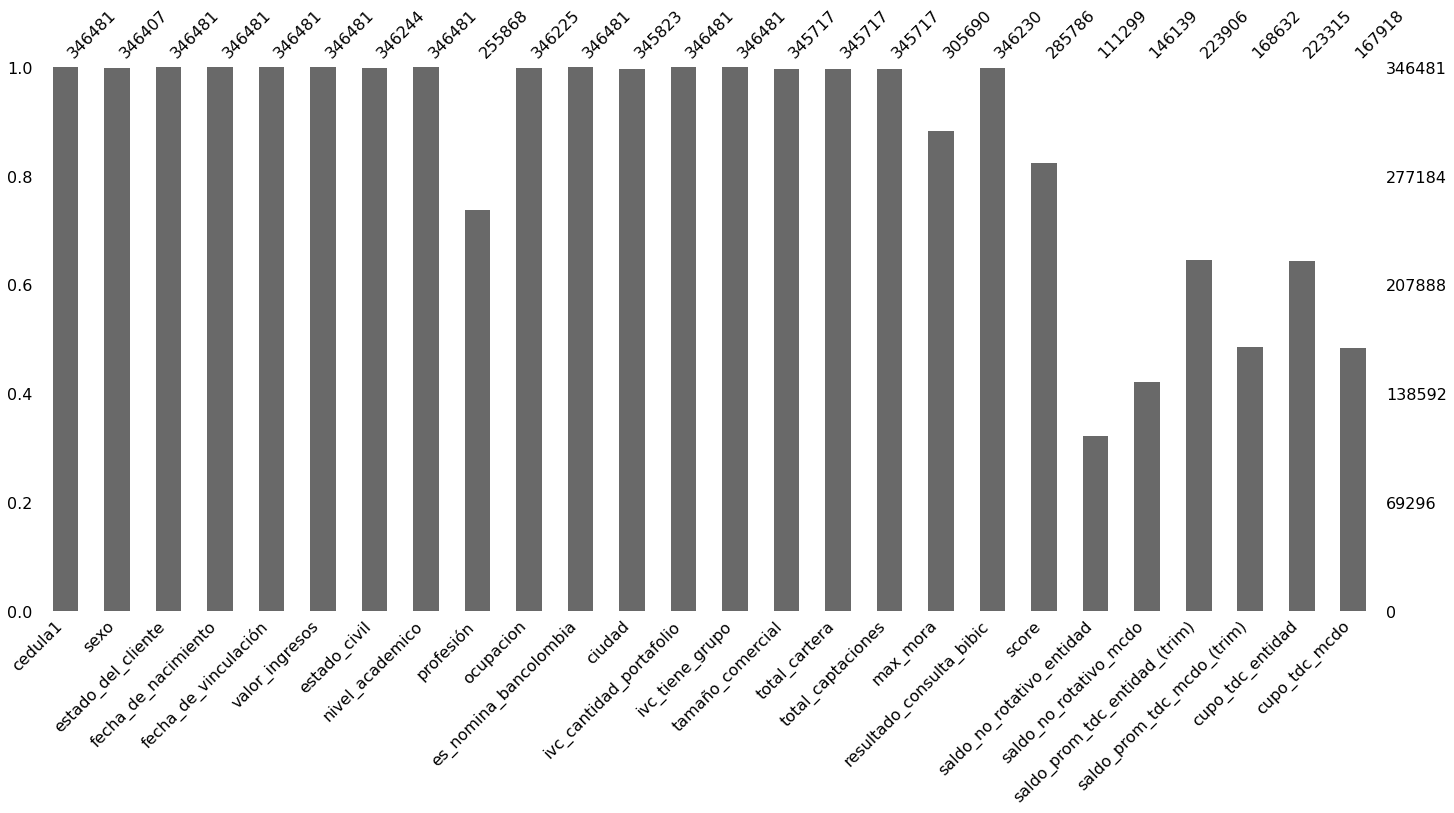

In [23]:
msno.bar(sociodemografico)

In [35]:
sociodemografico['cedula1'].value_counts().sort_values(ascending=False).head(10)

559      6
970      5
87230    4
10405    3
10394    3
10395    3
10396    3
10397    3
10398    3
10399    3
Name: cedula1, dtype: int64

In [37]:
sociodemografico[sociodemografico['cedula1'] == '87230']

,cedula1,sexo,estado_del_cliente,fecha_de_nacimiento,fecha_de_vinculación,valor_ingresos,estado_civil,nivel_academico,profesión,ocupacion,es_nomina_bancolombia,ciudad,ivc_cantidad_portafolio,ivc_tiene_grupo,tamaño_comercial,total_cartera,total_captaciones,max_mora,resultado_consulta_bibic,score,saldo_no_rotativo_entidad,saldo_no_rotativo_mcdo,saldo_prom_tdc_entidad_(trim),saldo_prom_tdc_mcdo_(trim),cupo_tdc_entidad,cupo_tdc_mcdo
79329,87230,M,Activo,19641021,2000-04-27,18000000.00,CASADO,UNIVERSITARIO,25.00,SOCIO - EMPLEADO,0,ENVIGADO,10,7,337498.00,316842.00,20656.00,0.00,S,818.00,295027.00,100577.00,28643.00,5978.00,30000.00,25438.00
195184,87230,M,Activo,19641021,2000-04-27,18000000.00,CASADO,UNIVERSITARIO,25.00,SOCIO - EMPLEADO,1,ENVIGADO,10,6,344316.00,333388.00,10927.00,0.00,S,825.00,308061.00,96736.00,26440.00,2684.00,30000.00,24848.00
310529,87230,M,Activo,19641021,2000-04-27,18000000.00,CASADO,UNIVERSITARIO,25.00,SOCIO - EMPLEADO,1,ENVIGADO,12,7,425320.00,348857.00,76463.00,0.00,S,619.00,43767.00,nan,nan,nan,nan,nan
310530,87230,M,Activo,19641021,2015-08-11,18315000.00,NaN,SIN INFORMACION,nan,OTRA,1,ENVIGADO,12,7,425320.00,348857.00,76463.00,0.00,S,619.00,43767.00,nan,nan,nan,nan,nan


In [38]:
sociodemografico[sociodemografico.duplicated(subset=['cedula1'])]

,cedula1,sexo,estado_del_cliente,fecha_de_nacimiento,fecha_de_vinculación,valor_ingresos,estado_civil,nivel_academico,profesión,ocupacion,es_nomina_bancolombia,ciudad,ivc_cantidad_portafolio,ivc_tiene_grupo,tamaño_comercial,total_cartera,total_captaciones,max_mora,resultado_consulta_bibic,score,saldo_no_rotativo_entidad,saldo_no_rotativo_mcdo,saldo_prom_tdc_entidad_(trim),saldo_prom_tdc_mcdo_(trim),cupo_tdc_entidad,cupo_tdc_mcdo
435,559,F,Activo,19800922,2007-07-25,2000000.00,SOLTERO,SIN INFORMACION,0.00,EMPLEADO,0,FUSAGASUGA,3,3,2.00,0.00,2.00,nan,S,nan,nan,nan,nan,nan,nan,nan
811,970,M,Activo,19150122,2015-03-21,1807000.00,NaN,SIN INFORMACION,nan,EMPLEADO,1,MEDELLIN,11,6,82858.00,3614.00,79244.00,6.00,S,872.00,0.00,nan,2445.00,nan,27000.00,nan
115503,3,M,Activo,19311010,1977-03-01,13577075.00,CASADO,UNIVERSITARIO,11.00,JUBILADO,1,"BOGOTA, D.C.",4,3,6563.00,5453.00,1110.00,0.00,S,428.00,5468.00,43580.00,nan,9413.00,nan,68300.00
115504,4,M,Activo,19300902,1999-01-14,3220000.00,CASADO,H,nan,JUBILADO,0,CALI,2,2,2315.00,629.00,1686.00,0.00,S,474.00,nan,20500.00,0.00,1643.00,2600.00,41224.00
115505,5,F,Activo,19221225,1980-12-09,1800000.00,VIUDO,H,nan,RENTISTA DE CAPITAL,0,"BOGOTA, D.C.",1,1,304.00,304.00,0.00,0.00,S,782.00,nan,nan,98.00,nan,1600.00,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346476,126123,F,Activo,19990725,2008-03-05,500000.00,SOLTERO,PRIMARIA,nan,ESTUDIANTE,0,MEDELLIN,3,3,499.00,251.00,248.00,0.00,S,780.00,nan,nan,8.00,nan,1000.00,nan
346477,126124,F,Activo,19990826,2014-06-05,0.00,SOLTERO,H,nan,ESTUDIANTE,0,BOGOTA D.C.,3,3,3013.00,1178.00,1834.00,0.00,S,737.00,nan,nan,1205.00,nan,5000.00,nan
346478,126125,M,Activo,19991112,2007-07-19,100000.00,SOLTERO,SIN INFORMACION,0.00,ESTUDIANTE,0,MEDELLIN,4,4,5403.00,5058.00,346.00,0.00,S,716.00,nan,nan,2452.00,nan,5000.00,nan
346479,126126,F,Activo,19991117,2004-04-21,0.00,SOLTERO,NINGUNO,nan,EMPLEADO,0,MEDELLIN,2,2,87.00,0.00,87.00,0.00,S,664.00,nan,nan,58.00,nan,1000.00,nan


In [39]:
sociodemografico = sociodemografico.drop_duplicates(subset=['cedula1'], keep=False)

In [40]:
sociodemografico.describe(exclude='number')

,cedula1,sexo,estado_del_cliente,fecha_de_nacimiento,fecha_de_vinculación,estado_civil,nivel_academico,ocupacion,ciudad,resultado_consulta_bibic
count,986,986,986,986,986,981,986,978,978,964
unique,986,2,3,939,794,7,10,13,111,2
top,125349,M,Activo,19000101,2015-09-28 00:00:00,SOLTERO,UNIVERSITARIO,EMPLEADO,"BOGOTA, D.C.",S
freq,1,543,596,14,7,390,362,747,271,802
first,NaN,NaN,NaN,NaN,1911-11-11 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2015-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN


In [41]:
cedula = sociodemografico['cedula1'].tolist()